In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('http://virtualfif.uaq.mx/diplomado/data/regresion/Multi/Fish.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.shape

(159, 7)

In [6]:
le_X = LabelEncoder()
df['Species'] = le_X.fit_transform(df['Species'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int32  
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), int32(1)
memory usage: 8.2 KB


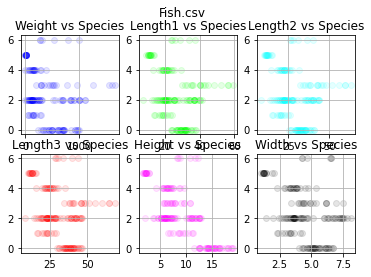

In [7]:
plt.suptitle('Fish.csv')

plt.subplot( 2 , 3 , 1 )
plt.title('Weight vs Species')
plt.scatter(df['Weight'], df['Species'], c='#0000ff', alpha=0.1)
plt.grid(1)

plt.subplot( 2 , 3 , 2 )
plt.title('Length1 vs Species')
plt.scatter(df['Length1'], df['Species'], c='#00ff00', alpha=0.1)
plt.grid(1)

plt.subplot( 2 , 3 , 3 )
plt.title('Length2 vs Species')
plt.scatter(df['Length2'], df['Species'], c='#00ffff', alpha=0.1)
plt.grid(1)

plt.subplot( 2 , 3 , 4 )
plt.title('Length3 vs Species')
plt.scatter(df['Length3'], df['Species'], c='#ff0000', alpha=0.1)
plt.grid(1)

plt.subplot( 2 , 3 , 5 )
plt.title('Height vs Species')
plt.scatter(df['Height'], df['Species'], c='#ff00ff', alpha=0.1)
plt.grid(1)

plt.subplot( 2 , 3 , 6 )
plt.title('Width vs Species')
plt.scatter(df['Width'], df['Species'], c='#000000', alpha=0.1)
plt.grid(1)

plt.show()

C:\Users\Tank3\.conda\envs\ML2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

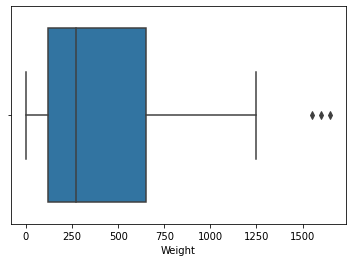

In [8]:
sbn.boxplot(df['Weight'])

In [9]:
Q1 = df['Weight'].quantile(0.25)
Q2 = df['Weight'].quantile(0.50)
Q3 = df['Weight'].quantile(0.75)
print(f'{Q1}, {Q2}, {Q3}')

120.0, 273.0, 650.0


In [10]:
IQR = Q3 - Q1
print(f'Rango intercuartílico: {IQR}')

Rango intercuartílico: 530.0


In [11]:
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)
print(f'{lower_fence}, {upper_fence}')

-675.0, 1445.0


In [12]:
o_df = df[(df['Weight'] < lower_fence) | (df['Weight'] > upper_fence)]
o_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 142 to 144
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  3 non-null      int32  
 1   Weight   3 non-null      float64
 2   Length1  3 non-null      float64
 3   Length2  3 non-null      float64
 4   Length3  3 non-null      float64
 5   Height   3 non-null      float64
 6   Width    3 non-null      float64
dtypes: float64(6), int32(1)
memory usage: 180.0 bytes


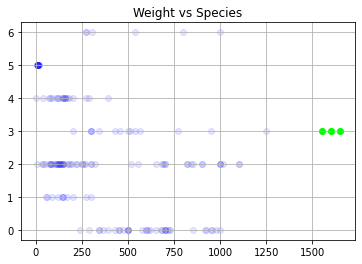

In [13]:
plt.title('Weight vs Species')
plt.scatter(df['Weight'], df['Species'], c='#0000ff', alpha=0.1)
plt.scatter(o_df['Weight'], o_df['Species'], c='#00ff00', alpha=1)
plt.grid(1)
plt.show()

In [14]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X.shape

(159, 6)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int((X.shape[0]*35)/100), random_state=0)

In [16]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [17]:
modelo.score(X_train, y_train)

0.7274771508474147

In [18]:
modelo.score(X_test, y_test)

0.5074021151350017

0.6998982672320662 - 0.3320999926516477 15%

0.7189988654660691 - 0.4124860892877281 20%

0.7260145841075277 - 0.4291898498829164 25%

0.7285655676708198 - 0.4579009936455072 30%

0.7274771508474147 - 0.5074021151350017 35%

In [19]:
y_pred = modelo.predict(X_test)

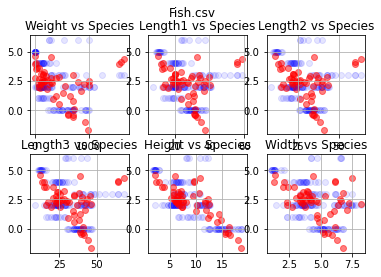

In [20]:
plt.suptitle('Fish.csv')

plt.subplot( 2 , 3 , 1 )
plt.title('Weight vs Species')
plt.scatter(df['Weight'], df['Species'], c='#0000ff', alpha=0.1)
plt.scatter(X_test[:,0], y_pred, c='#ff0000', alpha=0.5)
plt.grid(1)

plt.subplot( 2 , 3 , 2 )
plt.title('Length1 vs Species')
plt.scatter(df['Length1'], df['Species'], c='#0000ff', alpha=0.1)
plt.scatter(X_test[:,1], y_pred, c='#ff0000', alpha=0.5)
plt.grid(1)

plt.subplot( 2 , 3 , 3 )
plt.title('Length2 vs Species')
plt.scatter(df['Length2'], df['Species'], c='#0000ff', alpha=0.1)
plt.scatter(X_test[:,2], y_pred, c='#ff0000', alpha=0.5)
plt.grid(1)

plt.subplot( 2 , 3 , 4 )
plt.title('Length3 vs Species')
plt.scatter(df['Length3'], df['Species'], c='#0000ff', alpha=0.1)
plt.scatter(X_test[:,3], y_pred, c='#ff0000', alpha=0.5)
plt.grid(1)

plt.subplot( 2 , 3 , 5 )
plt.title('Height vs Species')
plt.scatter(df['Height'], df['Species'], c='#0000ff', alpha=0.1)
plt.scatter(X_test[:,4], y_pred, c='#ff0000', alpha=0.5)
plt.grid(1)

plt.subplot( 2 , 3 , 6 )
plt.title('Width vs Species')
plt.scatter(df['Width'], df['Species'], c='#0000ff', alpha=0.1)
plt.scatter(X_test[:,5], y_pred, c='#ff0000', alpha=0.5)
plt.grid(1)

plt.show()